In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
from mutedpy.utils.sequences.sequence_utils import add_variant_column
from mutedpy.experiments.streptavidin.streptavidin_loader import *

In [2]:
x3, y3, d3 = load_third_round()
x4, y4, d4 = load_last_round()

In [3]:
selection = d4[d4['round'] == "4th"]
selection = pd.concat([d3, selection])

In [4]:
selection = selection[['variant','LogFitness','class']]

In [5]:
selection = selection.groupby('variant').agg({'LogFitness': 'mean', 'class': 'first'}).reset_index()

In [6]:
selection

,variant,LogFitness,class
0,AAAFM,0.971105,3rd_aa_safe
1,AAAHY,1.447877,3rd_NAN_chimera
2,AAALY,0.836532,4th_aa-5-safe
3,AAAMM,1.342790,3rd_aa_safe
4,AAIGQ,0.657470,3rd_NAN_chimera
...,...,...,...
856,YVLGI,1.261139,3rd_aa_balanced
857,YVLGV,1.096673,3rd_aa_balanced
858,YVNYF,0.725145,3rd_NAN_chimera
859,YVPGL,1.069987,3rd_aa_balanced


In [7]:
#selection =selection[selection['class']!='3rd_NAN_chimera']

In [8]:
# load predictions in the first round by the models

# amino-acid
round_1_predictions_aa = pd.read_csv("../../../mutedpy/experiments/streptavidin/active_learning/AA_model/lists/predictions.csv")
intersection_df = pd.merge(round_1_predictions_aa, selection, on='variant', how='inner')
intersection_df
print (np.mean((intersection_df['LogFitness'].values - intersection_df['mean'].values)**2))

0.07946507718452284


In [9]:
# load predictions in the second round by the models
round_2_predictions_aa = pd.read_csv("../../../mutedpy/experiments/streptavidin/active_learning_2/AA_model/lists/predictions-aa.csv")
intersection_df = pd.merge(round_2_predictions_aa, selection, on='variant', how='inner')
print (np.mean((intersection_df['LogFitness'].values - intersection_df['mean'].values)**2))

# how many of the ones selected were predicted to be high? 

0.07373801891075166


In [10]:
print ("Amino-acid model:")
mask = intersection_df['mean'] > np.log10(8.625)
print ("Number predicted high:", np.sum(mask))
predicted_high = np.sum(mask)
mask2 = intersection_df[mask]['LogFitness'] > np.log10(8.625)
print ("Number of the predicted high, actually high:", np.sum(mask2))
actually_high_from = np.sum(mask2)
print ("true-positivity-rate",actually_high_from/predicted_high)
tp_aa = np.round(actually_high_from/predicted_high,2)
aa_high_actual = intersection_df.loc[mask].loc[mask2]

Amino-acid model:
Number predicted high: 236
Number of the predicted high, actually high: 113
true-positivity-rate 0.4788135593220339


In [11]:
round_2_predictions_geo = pd.read_csv("../../../mutedpy/experiments/streptavidin/active_learning_2/Geometric/lists/predictions-geo_Jan_05.csv")
round_2_predictions_geo = add_variant_column(round_2_predictions_geo) 
intersection_df = pd.merge(round_2_predictions_geo, selection, on='variant', how='inner')
print (np.mean((intersection_df['LogFitness'].values - intersection_df['mean'].values)**2))

0.09251591597418726


In [12]:
print ("Geometric model:")
mask = intersection_df['mean'] > np.log10(8.625)
print ("Number predicted high:", np.sum(mask))
predicted_high = np.sum(mask)
mask2 = intersection_df[mask]['LogFitness'] > np.log10(8.625)
print ("Number of the predicted high, actually high:", np.sum(mask2))
actually_high_from = np.sum(mask2)
print ("true-positivity-rate",actually_high_from/predicted_high)
tp_geo = np.round(actually_high_from/predicted_high,2)
geo_high_actual = intersection_df.loc[mask].loc[mask2]



Geometric model:
Number predicted high: 315
Number of the predicted high, actually high: 98
true-positivity-rate 0.3111111111111111


In [13]:
round_2_predictions_ros = pd.read_csv("../../../mutedpy/experiments/streptavidin/active_learning_2/Rosetta_init/lists/predictions-ro.csv")
round_2_predictions_ros = add_variant_column(round_2_predictions_ros) 
intersection_df = pd.merge(round_2_predictions_ros, selection, on='variant', how='inner')
print (np.mean((intersection_df['LogFitness'].values - intersection_df['mean'].values)**2))

0.07401370946905395


In [14]:
print ("Rosetta model:")
mask = intersection_df['mean'] > np.log10(8.625)
print ("Number predicted high:", np.sum(mask))
predicted_high = np.sum(mask)
mask2 = intersection_df[mask]['LogFitness'] > np.log10(8.625)
print ("Number of the predicted high, actually high:", np.sum(mask2))
actually_high_from = np.sum(mask2)
print ("true-positivity-rate",actually_high_from/predicted_high)
ro_high_actual = intersection_df.loc[mask].loc[mask2]
tp_r = np.round(actually_high_from/predicted_high,2)


Rosetta model:
Number predicted high: 332
Number of the predicted high, actually high: 147
true-positivity-rate 0.4427710843373494


In [15]:
ro_high_actual ['Model - hit success'] = 'Energy \n' + str(tp_r*100)+ "%"
geo_high_actual['Model - hit success'] = "Structure \n" + str(tp_geo*100)+ "%"
aa_high_actual ['Model - hit success'] = 'Chemical \n' + str(tp_aa*100) + "%"

actual_high_dts = pd.concat([ro_high_actual[['Model - hit success','LogFitness','variant','class']],
                             aa_high_actual[['Model - hit success','LogFitness','variant','class']],
                             geo_high_actual[['Model - hit success','LogFitness','variant','class']]])



In [16]:
actual_high_dts

,Model - hit success,LogFitness,variant,class
1,Energy \n44.0%,0.958931,CANVI,3rd_ro_safe
2,Energy \n44.0%,1.269214,CANRI,3rd_ro_safe
3,Energy \n44.0%,1.124356,CANKI,3rd_NAN_chimera
7,Energy \n44.0%,0.972080,CFVIG,3rd_ro_balanced
8,Energy \n44.0%,1.170929,CANLF,3rd_NAN_chimera
...,...,...,...,...
300,Structure \n31.0%,1.052247,FFQTQ,4th_safe
303,Structure \n31.0%,0.983583,QGYLE,3rd_NAN_chimera
307,Structure \n31.0%,0.952116,CINVI,3rd_ro_balanced
311,Structure \n31.0%,1.032891,NAIVV,3rd_geo_safe


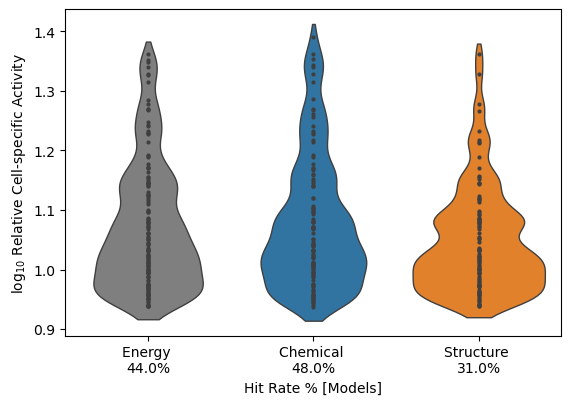

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
bottom = 0.2
plt.subplots_adjust(bottom=bottom)
palette = {'Energy \n' + str(tp_r*100)+ "%":"tab:gray" ,"Structure \n" + str(tp_geo*100)+ "%":"tab:orange",'Chemical \n' + str(tp_aa*100) + "%":'tab:blue'}
sns.violinplot(data=actual_high_dts,x = 'Model - hit success',y = 'LogFitness',  bw=.2, cut=1, linewidth=1,  palette=palette, inner="points")
plt.ylabel("$\log_{10}$ Relative Cell-specific Activity")
plt.xlabel("Hit Rate % [Models]")
plt.savefig("hit-sucess-comparison.pdf", dpi = 200,bbox_inches='tight')

In [18]:
# plots points for three different models 

In [19]:
actual_high_dts = actual_high_dts.sort_values(by = 'LogFitness', ascending = False)
selected_for_plot = actual_high_dts.head(20)

In [20]:
selected_for_plot

,Model - hit success,LogFitness,variant,class
28,Chemical \n48.0%,1.390148,CLPPG,3rd_aa_balanced
47,Energy \n44.0%,1.361491,CITIG,3rd_NAN_chimera
245,Structure \n31.0%,1.361491,CITIG,3rd_NAN_chimera
69,Chemical \n48.0%,1.361491,CITIG,3rd_NAN_chimera
114,Chemical \n48.0%,1.354419,CVREV,3rd_NAN_chimera
88,Energy \n44.0%,1.351396,CTNLV,3rd_ro_safe
28,Energy \n44.0%,1.349372,CANYV,3rd_ro_balanced
129,Chemical \n48.0%,1.342790,AAAMM,3rd_aa_safe
122,Energy \n44.0%,1.340063,CINRV,3rd_NAN_chimera
174,Chemical \n48.0%,1.340063,CINRV,3rd_NAN_chimera


In [21]:
dic = {'Structure \n31.0%':2,'Energy \n44.0%':1,'Chemical \n48.0%':0}

['Chemical \n48.0%']
[0]
['Energy \n44.0%', 'Structure \n31.0%', 'Chemical \n48.0%']
[0, 1, 2]
['Chemical \n48.0%']
[0]
['Energy \n44.0%']
[1]
['Energy \n44.0%']
[1]
['Chemical \n48.0%']
[0]
['Energy \n44.0%', 'Chemical \n48.0%']
[0, 1]
['Structure \n31.0%', 'Chemical \n48.0%', 'Energy \n44.0%']
[0, 1, 2]
['Energy \n44.0%']
[1]
['Energy \n44.0%', 'Chemical \n48.0%']
[0, 1]
['Chemical \n48.0%']
[0]
['Energy \n44.0%']
[1]
['Structure \n31.0%', 'Energy \n44.0%']
[1, 2]


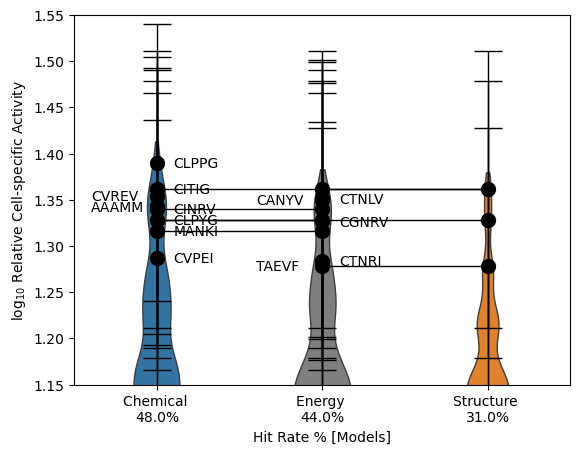

In [26]:
#plt.figure(figsize=(20,10))
sns.violinplot(data=actual_high_dts,x = 'Model - hit success',y = 'LogFitness',  bw=.2, cut=1, linewidth=1,  palette=palette)
cmap = plt.get_cmap('tab20')
offsets = [0.1,0.1,-0.4,0.1,-0.4,-0.4,0.1,0.1,0.1,0.1,0.1,0.1,-0.4,-0.4,-0.4]
for index, obj in enumerate(selected_for_plot['variant'].unique()):
    mask = selected_for_plot['variant']==obj
    y = selected_for_plot[mask][['LogFitness']].values
    x = [i[0] for i in selected_for_plot[mask][['Model - hit success']].values]
    print (x)
    integers = sorted([dic[i] for i in x])
    print (integers)
    plt.text(integers[0]+offsets[index],y[0]-0.005,s = obj)
    plt.errorbar(x,y.reshape(-1),marker = 'o', linestyle = '-', label = obj, markersize = 10, color='black',yerr = 0.15, capsize=10, linewidth = 1)
    #plt.plot(x,y.reshape(-1),marker = 'o', label = obj, markersize = 10, color='black', zorder = 10)
    #lt.legend(ncol = 4, fontsize = 20)
    plt.xlim([-0.5,2.5])
    plt.ylim([1.15,1.55])
plt.ylabel("$\log_{10}$ Relative Cell-specific Activity")
plt.xlabel("Hit Rate % [Models]")
plt.savefig("zoomed-hit-scuess-comparison.pdf",dpi = 200,bbox_inches='tight')

TypeError: errorbar() got multiple values for argument 'yerr'

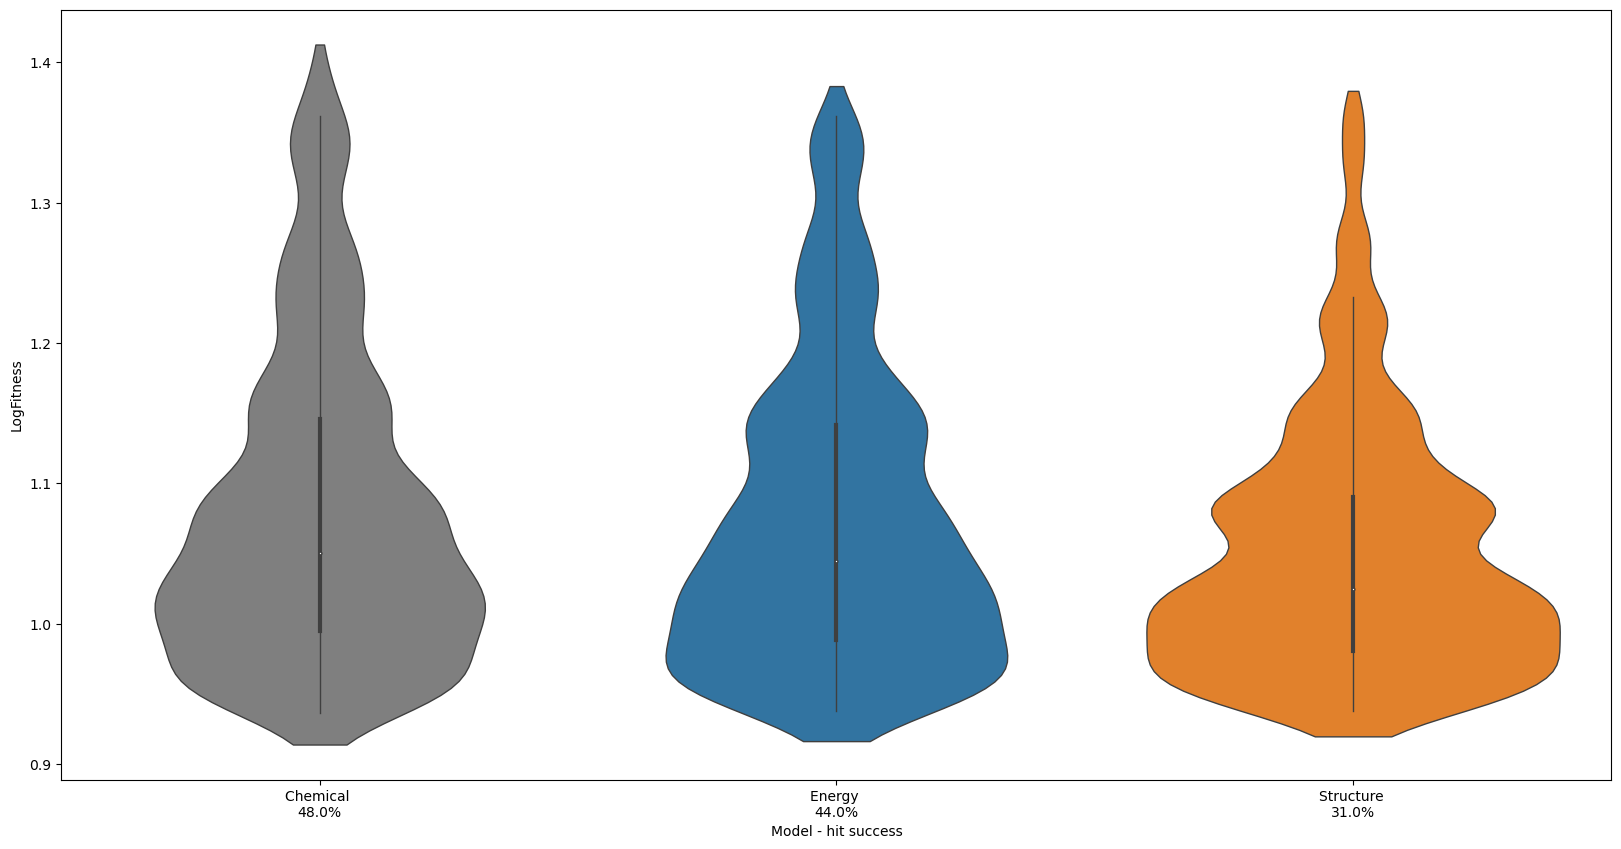

In [27]:
plt.figure(figsize=(20,10))
sns.violinplot(data=actual_high_dts,x = 'Model - hit success',y = 'LogFitness',  bw=.2, cut=1, linewidth=1,  palette=['tab:gray','tab:blue','tab:orange'])
cmap = plt.get_cmap('tab20')
for index, obj in enumerate(selected_for_plot['variant'].unique()):
    mask = selected_for_plot['variant']==obj
    y = selected_for_plot[mask][['LogFitness']].values
    x = [i[0] for i in selected_for_plot[mask][['Model - hit success']].values]
    
    #plt.text(x[0],y[0]-0.005,s = obj)
    plt.errorbar(x,y,'o-', label = obj, markersize = 10, color='black', yerr = 0.1)
    #lt.legend(ncol = 4, fontsize = 20)
    plt.xlim([-0.5,2.5])
    plt.ylim([0.9,1.45])

In [ ]:
actual_high_dts= actual_high_dts.head(50)


In [ ]:
# sort top 20

In [ ]:
mask1 = actual_high_dts["Model - hit success"]=="Rosetta \n 47%"
mask2 = actual_high_dts["Model - hit success"]=="AminoAcid \n 51%"
mask3 = actual_high_dts["Model - hit success"]=="Geometric \n 34%"


In [ ]:
np.sum(mask3)

In [ ]:
actual_high_dts["LogFitness_Rosetta"] = 0
actual_high_dts["LogFitness_AminoAcid"] = 0
actual_high_dts["LogFitness_Geometric"] = 0

actual_high_dts["LogFitness_Rosetta"][mask1] = actual_high_dts["LogFitness"][mask1]
actual_high_dts["LogFitness_AminoAcid"][mask2] = actual_high_dts["LogFitness"][mask2]
actual_high_dts["LogFitness_Geometric"][mask3] = actual_high_dts["LogFitness"][mask3]
